In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dashlink/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [0]:
# set output folder
# outpath = Path('png1a'); outpath #unnecessary, will only use line plot model
outpath = Path('png1'); outpath

PosixPath('png1')

In [0]:
! ls -alh "{trnpath}"/{outpath}

total 8.0K
drwx------ 2 root root 4.0K Sep 13 13:53 non
drwx------ 2 root root 4.0K Sep 13 13:59 typ


## Ingest data

In [0]:
trnpath/outpath

PosixPath('/content/gdrive/My Drive/dashlink/Train/png1')

In [0]:
# form item list
il = ImageList.from_folder(trnpath/outpath)

In [0]:
il.items[0]

PosixPath('/content/gdrive/My Drive/dashlink/Train/png1/non/687200104170717-1min.png')

In [0]:
# inspect item list
il

ImageList (666 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png1

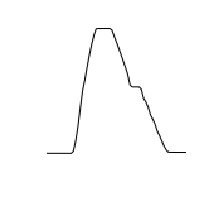

In [0]:
il[21].show()

In [0]:
! ls "{trnpath}"/{outpath}

non  typ


In [0]:
# form train and valid item lists
#set seed to always get the same validation set:
ils = il.split_by_rand_pct(valid_pct=0.2, seed=42); type(ils); ils

ItemLists;

Train: ImageList (533 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Valid: ImageList (133 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Test: None

In [0]:
# form label lists
lls = ils.label_from_folder(); lls

LabelLists;

Train: LabelList (533 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
non,non,non,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Valid: LabelList (133 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,non,typ,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Test: None

In [0]:
x,y = lls.train[7]; x,y

(Image (3, 130, 133), Category non)

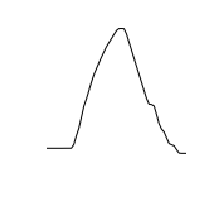

In [0]:
x.show()

In [0]:
tfms = get_transforms(do_flip=False, flip_vert=False, 
                      max_rotate=0.0, max_zoom=1, 
                      max_lighting=0, max_warp=0)

In [0]:
# lls = lls.transform(tfms)
lls = lls.transform(tfms, size=128)

In [0]:
bs = 8
# bs = 16
# bs = 32
# bs = 64

In [0]:
data = lls.databunch(bs=bs).normalize(imagenet_stats)

In [0]:
x,y = data.train_ds[4]

Category non

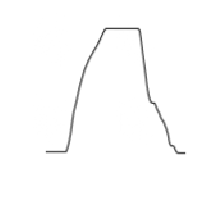

In [0]:
x.show(); y

In [0]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([8, 3, 128, 128]), torch.Size([8]))

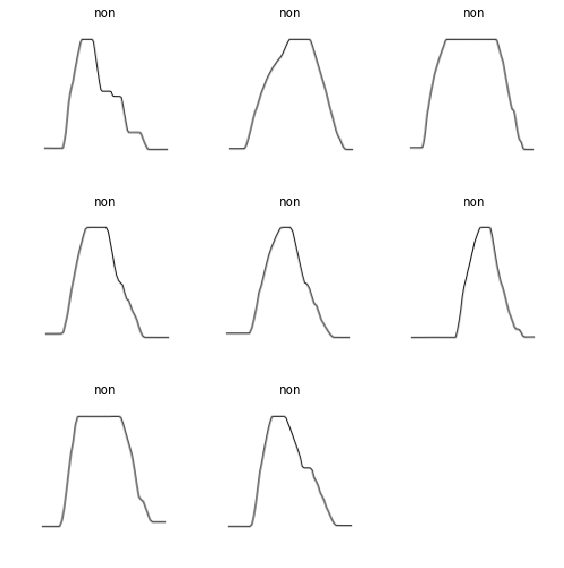

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
data.classes

['non', 'typ']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non', 'typ'], 2, 533, 133)

## Train model

In [0]:
# arch = models.resnet18
# arch = models.resnet34
arch = models.resnet50

In [0]:
# learn = cnn_learner(data, arch, metrics=error_rate)
learn = cnn_learner(data, arch, 
    metrics=[FBeta(average='binary',pos_label=1,beta=1), 
             Recall(), 
             Precision(),
             error_rate])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


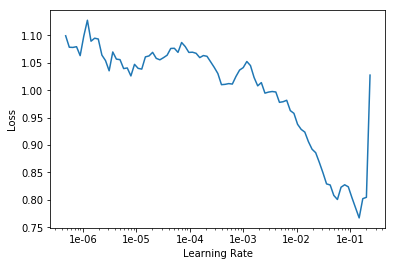

In [0]:
# learn.lr_find()
learn.lr_find(start_lr=1e-07, end_lr=6e-1)
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(8, slice(lrf))

# learn.fit_one_cycle(16, slice(3e-4)) #
# learn.fit_one_cycle(16, slice(4e-4)) #

# learn.fit_one_cycle(16, slice(1e-5)) #
# learn.fit_one_cycle(32, slice(2e-5)) #
# learn.fit_one_cycle(16, slice(5e-5)) #

# learn.fit_one_cycle(16, slice(1e-4)) #
# learn.fit_one_cycle(16, slice(2e-4)) #
# learn.fit_one_cycle(16, slice(3e-4)) #
# learn.fit_one_cycle(16, slice(5e-4)) #

# learn.fit_one_cycle(16, slice(1e-3)) #
# learn.fit_one_cycle(1, slice(2e-3)) #
# learn.fit_one_cycle(32, slice(3e-3)) #
# learn.fit_one_cycle(32, slice(4e-3)) #
# learn.fit_one_cycle(16, slice(5e-3)) #.83
# learn.fit_one_cycle(16, slice(6e-3)) #.72
learn.fit_one_cycle(16, slice(7e-3)) #.88,.83
# learn.fit_one_cycle(16, slice(8e-3)) #.73
# learn.fit_one_cycle(16, slice(9e-3)) #.78

# learn.fit_one_cycle(16, slice(1e-2)) #.76
# learn.fit_one_cycle(16, slice(2e-2)) #.81
# learn.fit_one_cycle(16, slice(3e-2)) #.75
# learn.fit_one_cycle(16, slice(4e-2)) #
# learn.fit_one_cycle(16, slice(5e-2)) #
# learn.fit_one_cycle(16, slice(6e-2)) #

epoch,train_loss,valid_loss,f_beta,recall,precision,error_rate,time
0,0.695765,0.585405,0.448276,0.928571,0.295455,0.240602,00:06
1,0.379983,0.255318,0.357143,0.357143,0.357143,0.135338,00:06
2,0.269934,0.159048,0.705882,0.857143,0.600000,0.075188,00:06
3,0.160277,0.364888,0.000000,0.000000,nan,0.105263,00:06
4,0.183532,0.276096,0.777778,1.000000,0.636364,0.060150,00:06
5,0.195552,0.218864,0.545455,0.428571,0.750000,0.075188,00:06
6,0.120397,0.309274,0.133333,0.071429,1.000000,0.097744,00:06
7,0.155006,0.144105,0.689655,0.714286,0.666667,0.067669,00:06
8,0.206158,0.107608,0.774194,0.857143,0.705882,0.052632,00:06
9,0.164837,0.697308,0.571429,1.000000,0.400000,0.157895,00:06


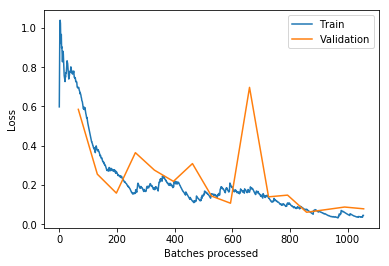

In [0]:
learn.recorder.plot_losses()

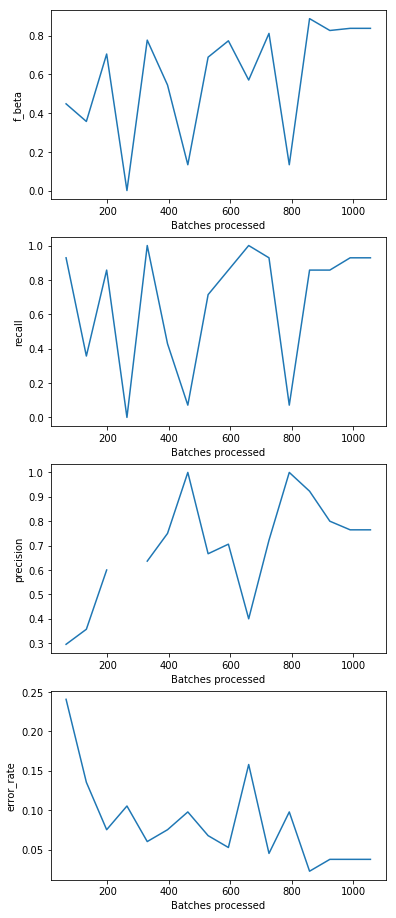

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-1') #0.838710

In [0]:
#go back to learn.fit_one_cycle(...)

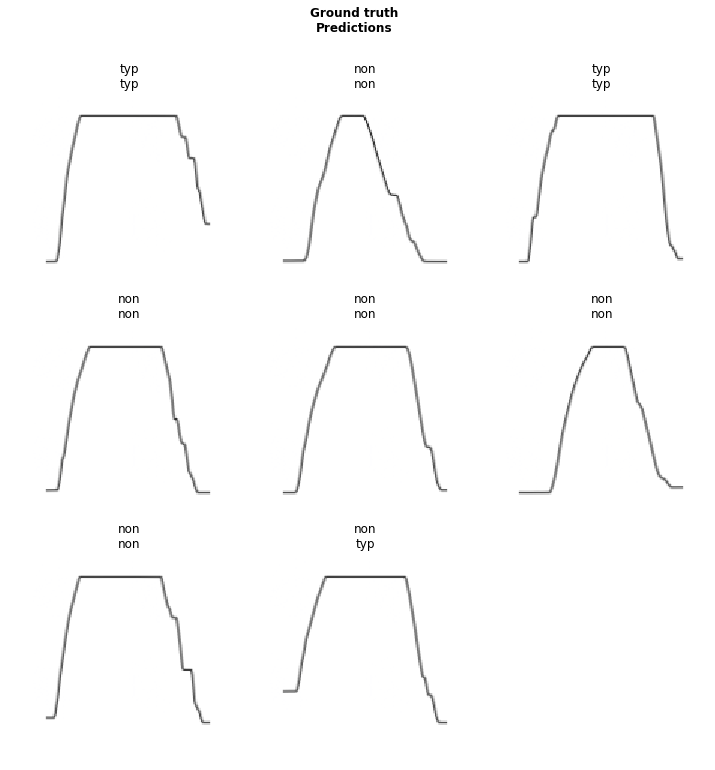

In [0]:
learn.show_results(rows=3)

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (533 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
non,non,non,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Valid: LabelList (133 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,non,typ,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


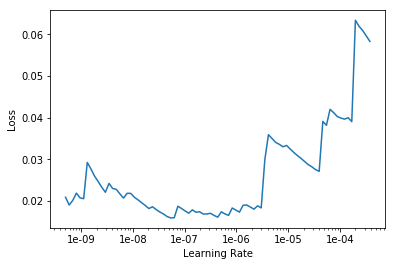

In [0]:
# learn.lr_find()
# learn.lr_find(stop_div=False)
learn.lr_find(start_lr=1e-10, end_lr=1e-3, stop_div=False)
learn.recorder.plot()

In [0]:
lrf = 7e-3 #at steepest part of curve (that was used above)
# lru = 1e-8 #at least an order below the minimum
learn.fit_one_cycle(1, slice(1e-10, lrf/10)) #.86m
# learn.fit_one_cycle(16, slice(1e-9, lrf/10)) #.85m
# learn.fit_one_cycle(16, slice(1e-8, lrf/10)) #.75 overf
# learn.fit_one_cycle(16, slice(1e-7, lrf/10)) #
# learn.fit_one_cycle(16, slice(1e-6, lrf/10)) #
# learn.fit_one_cycle(16, slice(1e-5, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-9, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-8, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-7, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-6, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-5, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-4, lrf/5)) #

epoch,train_loss,valid_loss,f_beta,recall,precision,error_rate,time
0,0.024927,0.110404,0.800000,0.857143,0.750000,0.045113,00:09


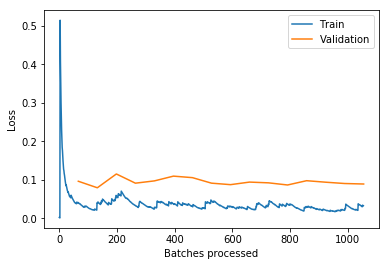

In [0]:
learn.recorder.plot_losses()

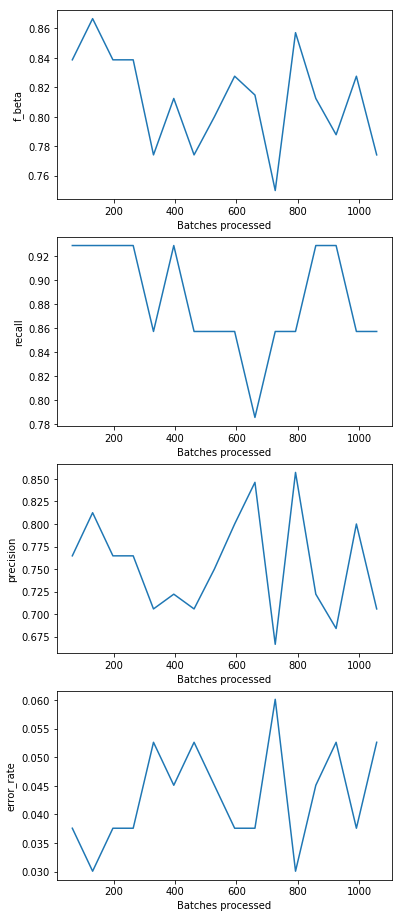

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-2') #838

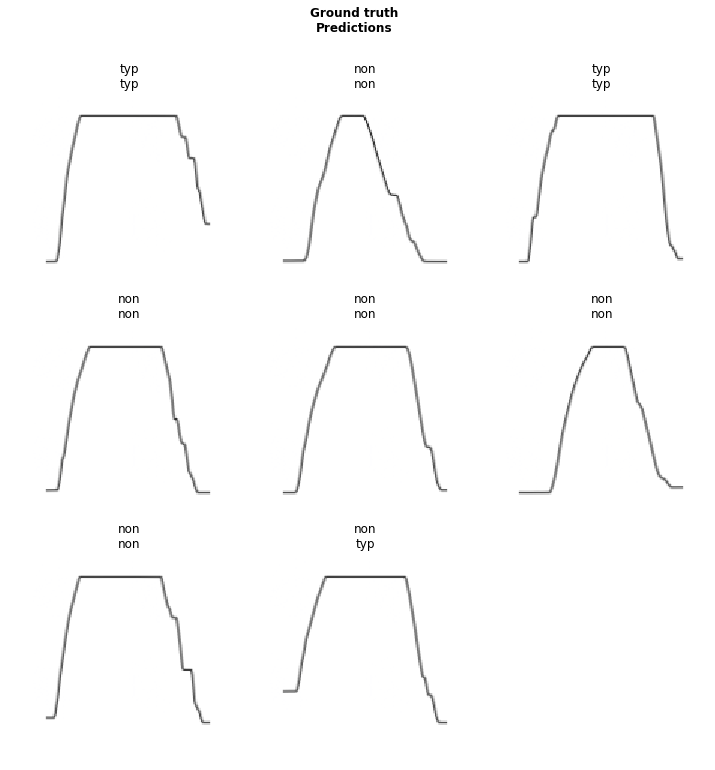

In [0]:
learn.show_results()

## Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (533 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
non,non,non,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Valid: LabelList (133 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,non,typ,non,non
Path: /content/gdrive/My Drive/dashlink/Train/png1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

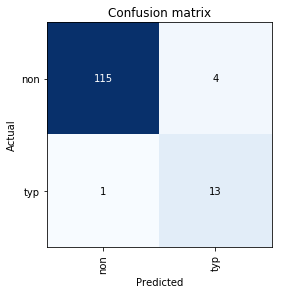

In [0]:
interp.plot_confusion_matrix() #133 items in validation set

In [1]:
TP = 13 #True Positives
FP = 4 #False Positives
FN = 1 #False Negatives
precision = TP/(TP + FP) #TP / prediction positives
recall = TP/(TP + FN) #TP / actual positives
F1_score = 2*( (precision*recall) / (precision+recall) )
precision,recall,F1_score

(0.7647058823529411, 0.9285714285714286, 0.8387096774193549)

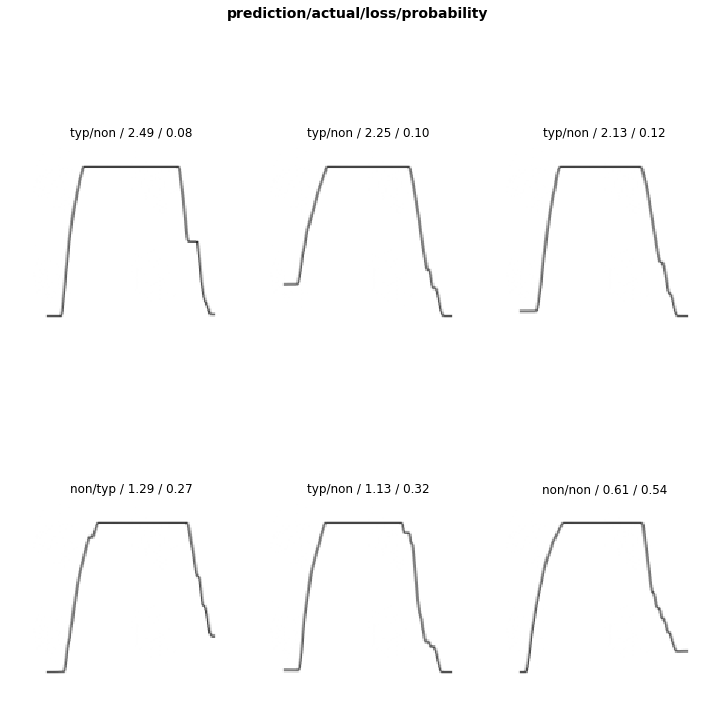

In [0]:
interp.plot_top_losses(6)

## Test Inference/Production (on train data)

In [0]:
learn.export()

In [0]:
!ls -altrh "{trnpath}"/{outpath}/export.pkl

-rw------- 1 root root 99M Sep 13 15:31 '/content/gdrive/My Drive/dashlink/Train/png1/export.pkl'


In [0]:
!ls "{trnpath}"/{outpath}/non

687200104111158-1min.png  687200108171021-1min.png  687200110130934-1min.png
687200104111441-1min.png  687200108171238-1min.png  687200110131103-1min.png
687200104120347-1min.png  687200108171244-1min.png  687200110131527-1min.png
687200104120604-1min.png  687200108171915-1min.png  687200110140908-1min.png
687200104121106-1min.png  687200108180615-1min.png  687200110141224-1min.png
687200104121330-1min.png  687200108180802-1min.png  687200110141444-1min.png
687200104130631-1min.png  687200108181225-1min.png  687200110150944-1min.png
687200104130953-1min.png  687200108181535-1min.png  687200110151437-1min.png
687200104131343-1min.png  687200108181840-1min.png  687200110151831-1min.png
687200104131515-1min.png  687200108182218-1min.png  687200110160613-1min.png
687200104140606-1min.png  687200108192043-1min.png  687200110160848-1min.png
687200104140748-1min.png  687200108201232-1min.png  687200110161652-1min.png
687200104141245-1min.png  687200108201857-1min.png  687200110162002-1min.png

In [0]:
learn = load_learner(trnpath/outpath)

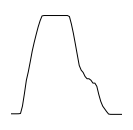

In [0]:
# img = open_image(path/'non'/'687200107241645-1min.png'); img
img = open_image(trnpath/outpath/'non'/'687200110112000-1min.png'); img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class,pred_idx,outputs

(Category non, tensor(0), tensor([9.9962e-01, 3.8237e-04]))